In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "cm",
      "font.size" : "12",
      "figure.figsize" : [8,8]}
plt.rcParams.update(rc)

%config InlineBackend.figure_format='retina'

In [2]:
mu, sigma = 1, 0.2
N = int(1e3)
dist = norm(mu, sigma)
tries = dist.rvs(N)

# Part 1

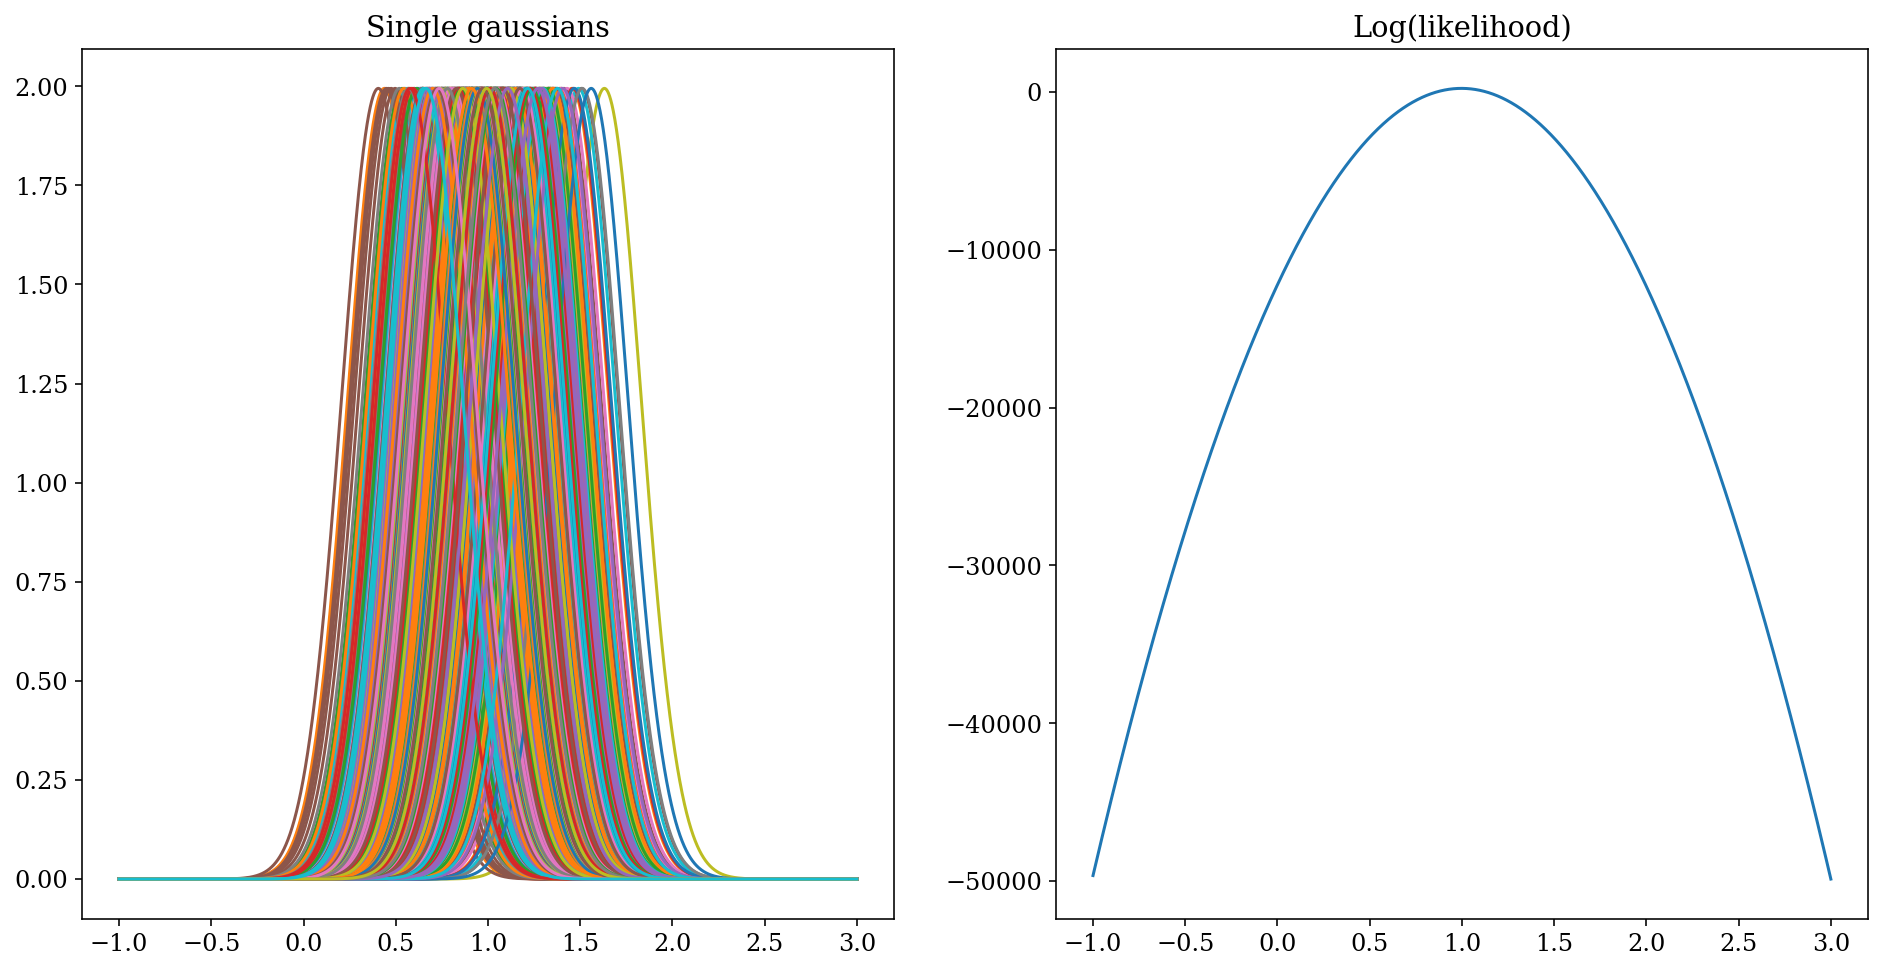

In [45]:
fig, ax = plt.subplots(1, 2, figsize = [16, 8])
x_grid = np.linspace(-1, 3, 10000)
L = 0
for mu_try in tries:
    dist_try = norm(mu_try, sigma)
    L += np.log(dist_try.pdf(x_grid))
    ax[0].plot(x_grid, dist_try.pdf(x_grid))
    
ax[1].plot(x_grid, L)

ax[0].set_title('Single gaussians')
ax[1].set_title('Log(likelihood)')
plt.show()

In [46]:
max_L = x_grid[np.argmax(L)]
mean =  np.mean(tries)
print('The numerical best estimator is {:.4f}, the analytical mean is {:.4f}'.format(max_L, mean))

The numerical best estimator is 0.9978, the analytical mean is 0.9978


# Part 2

In [47]:
#I order, should be zero
np.diff(L)[np.argmax(L)]

-0.00229734787208713

In [48]:
#II order
II_der = np.diff(L, n = 2)[np.argmax(L)] / (x_grid[1] - x_grid[0])**2
sigma_L = np.sqrt(-1 / II_der)
sigma_mean = sigma / np.sqrt(N)
print('the numerical best estimator for sigma is {:.4f}, the analytical sigma is {:.4f}'.format(sigma_L, sigma_mean))

the numerical best estimator for sigma is 0.0063, the analytical sigma is 0.0063


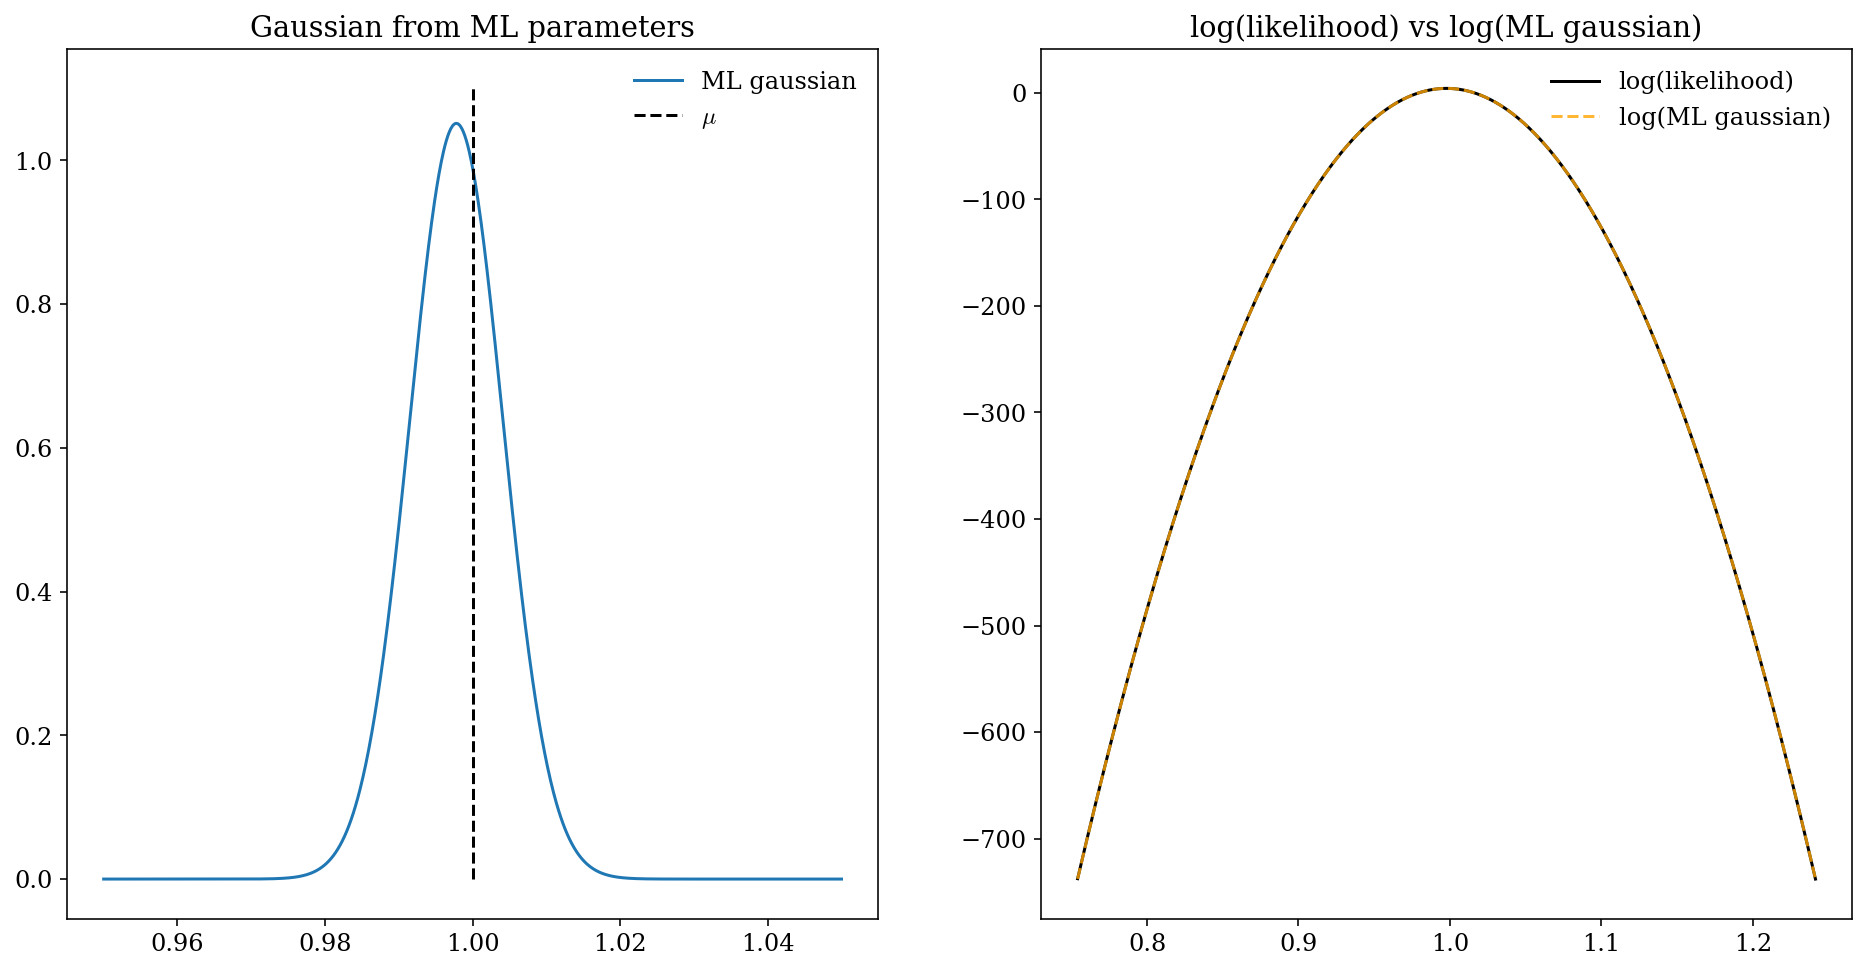

In [49]:
fig, axs = plt.subplots(1, 2, figsize = [16, 8])
distr_L = norm(max_L, sigma_L)
new_x = np.linspace(0.95, 1.05, 1000)

axs[0].plot(new_x, distr_L.pdf(new_x) / 60, label = 'ML gaussian')
axs[0].vlines(mu, 0, 1.1, color = 'k', ls = '--', label = r'$\mu$')
axs[0].legend(frameon = False)
axs[0].set_title('Gaussian from ML parameters')

#overplot the likelihood
shift = L.max() - np.log(distr_L.pdf(x_grid)[distr_L.pdf(x_grid) != 0]).max()
axs[1].plot(x_grid[distr_L.pdf(x_grid) != 0], L[distr_L.pdf(x_grid) != 0] - shift, c = 'k', label = 'log(likelihood)')
axs[1].plot(x_grid[distr_L.pdf(x_grid) != 0], np.log(distr_L.pdf(x_grid)[distr_L.pdf(x_grid) != 0]), c = 'orange', ls = '--', alpha = 0.8, label = 'log(ML gaussian)')
axs[1].legend(frameon = False)
axs[1].set_title('log(likelihood) vs log(ML gaussian)')

plt.show()

# Part 3

In [51]:
sigma_sigma = 0.05
dist_sigma = norm(sigma, sigma_sigma)
sigma_tries = dist_sigma.rvs(N)

## Part 3.1

/var/folders/w4/6z0g1ymx70v92r6vwcmmh64h0000gn/T/ipykernel_5775/3655586469.py:6: RuntimeWarning: divide by zero encountered in log
  L += np.log(dist_try.pdf(x_grid))


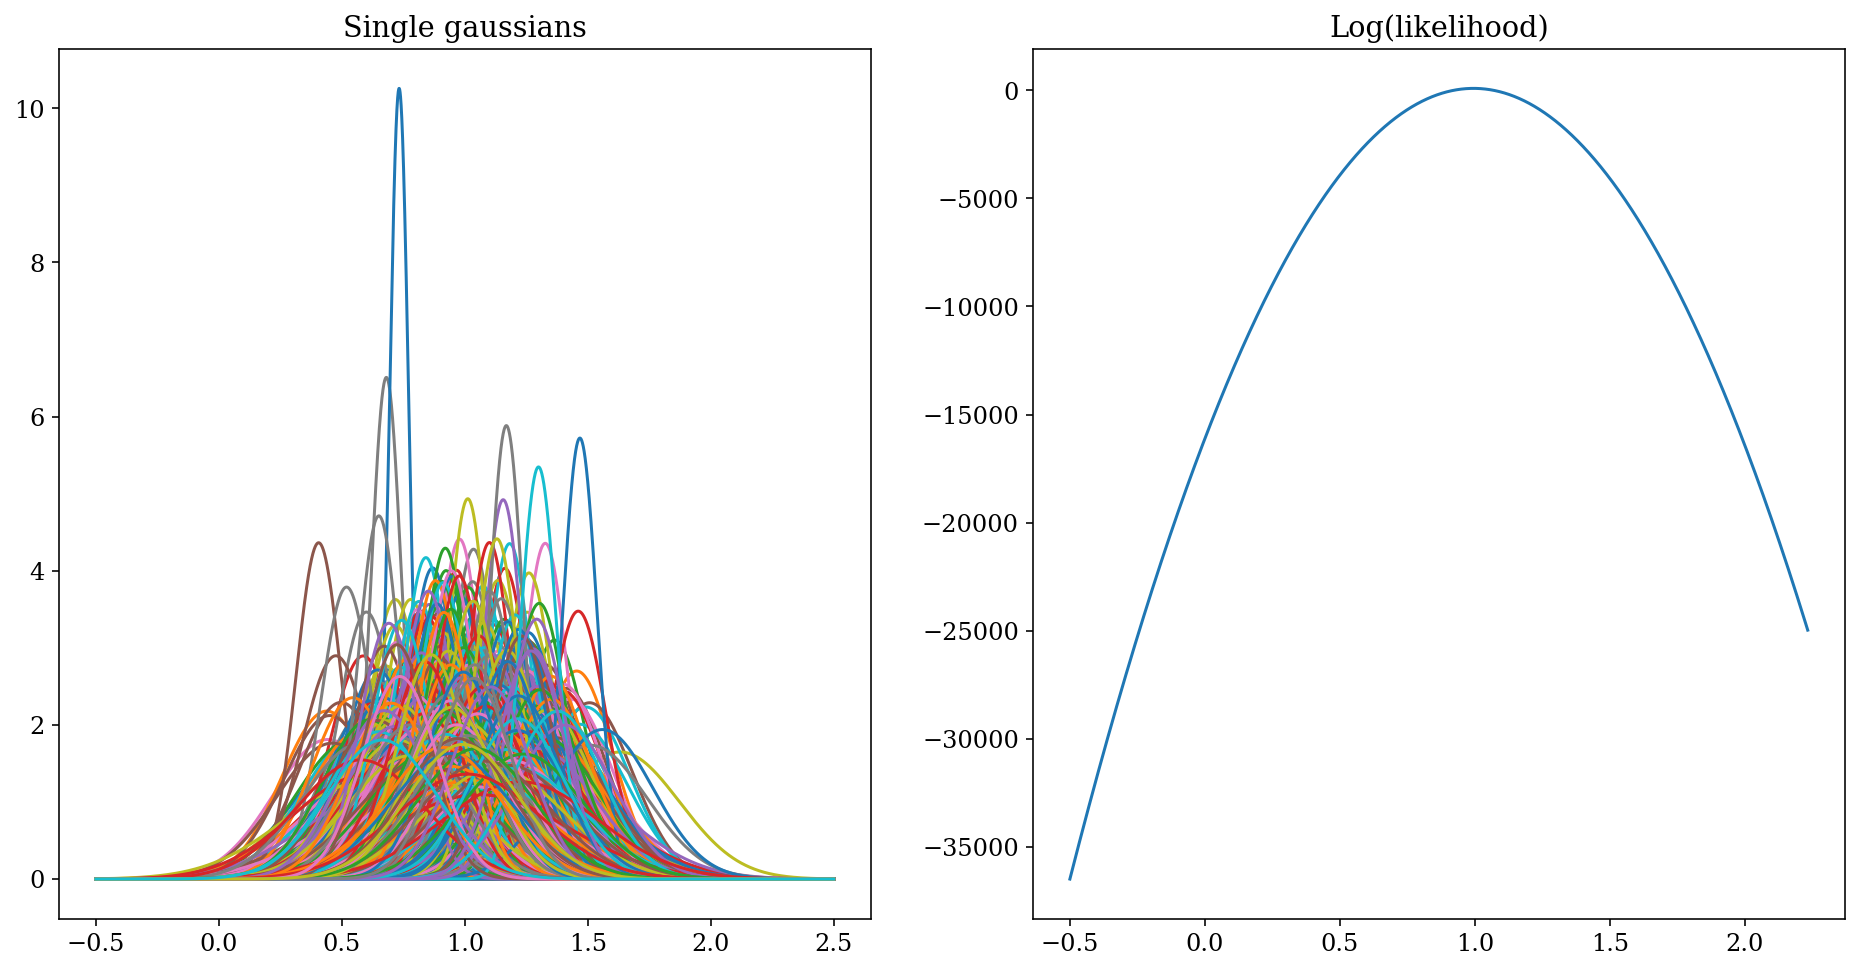

In [65]:
fig, ax = plt.subplots(1, 2, figsize = [16, 8])
x_grid = np.linspace(-0.5, 2.5, 10000)
L = 0
for mu_try, sigma_try in zip(tries, sigma_tries):
    dist_try = norm(mu_try, sigma_try)
    L += np.log(dist_try.pdf(x_grid))
    ax[0].plot(x_grid, dist_try.pdf(x_grid))
    
ax[1].plot(x_grid, L)

ax[0].set_title('Single gaussians')
ax[1].set_title('Log(likelihood)')
plt.show()

In [57]:
max_L = x_grid[np.argmax(L)]
mean =  np.mean(tries)
print('The numerical best estimator is {:.4f}, the analytical mean is {:.4f}'.format(max_L, mean))

The numerical best estimator is 0.9954, the analytical mean is 0.9978


Of course now a simple mean fails. Wehave to use a weighted mean:

In [59]:
w_mean = np.mean(tries / sigma_tries**2) / np.mean(1 / sigma_tries**2)
print('The numerical best estimator is {:.4f}, the analytical weighted mean is {:.4f}'.format(max_L, w_mean))

The numerical best estimator is 0.9954, the analytical weighted mean is 0.9954


## Part 3.2

In [62]:
L

array([-inf, -inf, -inf, ..., -inf, -inf, -inf])

In [60]:
#I order, should be zero
np.diff(L)[np.argmax(L)]

/Users/alessandrosantini/.pyenv/versions/3.8.12/lib/python3.8/site-packages/numpy/lib/function_base.py:1423: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


-0.0023551824603771365

In [61]:
#II order
II_der = np.diff(L, n = 2)[np.argmax(L)] / (x_grid[1] - x_grid[0])**2
sigma_L = np.sqrt(-1 / II_der)
sigma_mean = sigma / np.sqrt(N)
print('the numerical best estimator for sigma is {:.4f}, the analytical sigma is {:.4f}'.format(sigma_L, sigma_mean))

the numerical best estimator for sigma is 0.0055, the analytical sigma is 0.0063


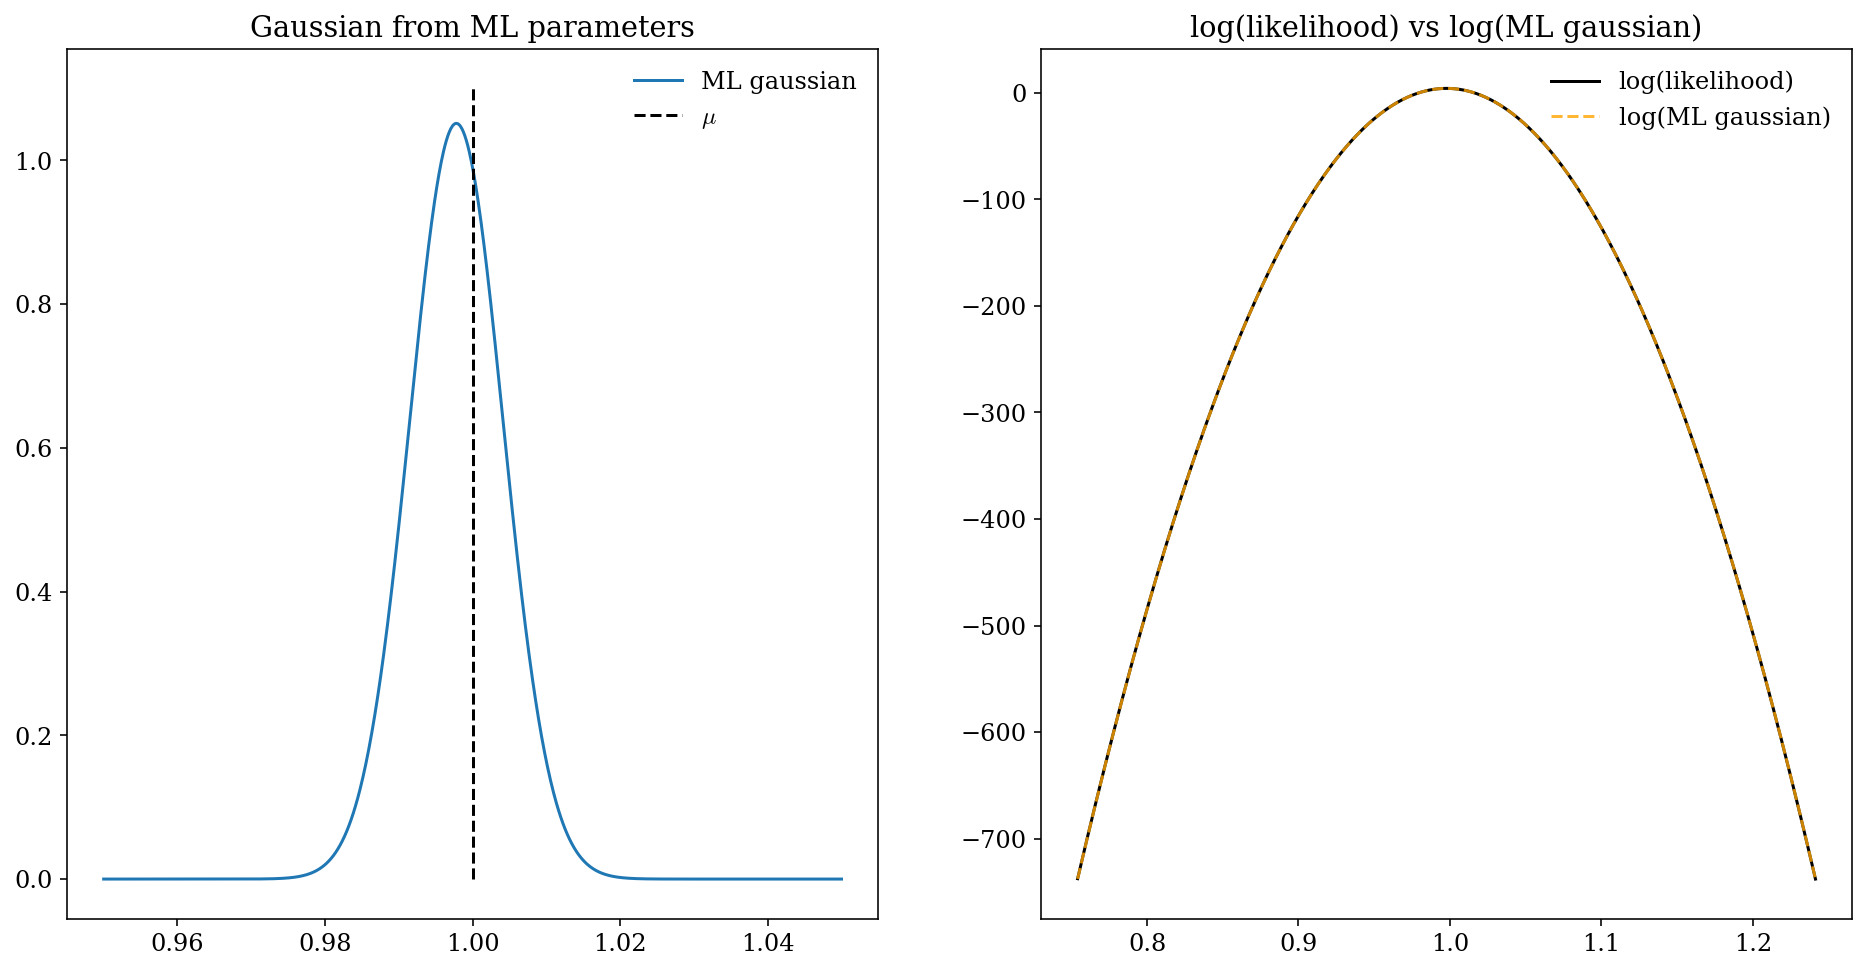

In [49]:
fig, axs = plt.subplots(1, 2, figsize = [16, 8])
distr_L = norm(max_L, sigma_L)
new_x = np.linspace(0.95, 1.05, 1000)

axs[0].plot(new_x, distr_L.pdf(new_x) / 60, label = 'ML gaussian')
axs[0].vlines(mu, 0, 1.1, color = 'k', ls = '--', label = r'$\mu$')
axs[0].legend(frameon = False)
axs[0].set_title('Gaussian from ML parameters')

#overplot the likelihood
shift = L.max() - np.log(distr_L.pdf(x_grid)[distr_L.pdf(x_grid) != 0]).max()
axs[1].plot(x_grid[distr_L.pdf(x_grid) != 0], L[distr_L.pdf(x_grid) != 0] - shift, c = 'k', label = 'log(likelihood)')
axs[1].plot(x_grid[distr_L.pdf(x_grid) != 0], np.log(distr_L.pdf(x_grid)[distr_L.pdf(x_grid) != 0]), c = 'orange', ls = '--', alpha = 0.8, label = 'log(ML gaussian)')
axs[1].legend(frameon = False)
axs[1].set_title('log(likelihood) vs log(ML gaussian)')

plt.show()